In [ ]:
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
train = files.upload()
test = files.upload()
survive = files.upload()

Saving train.csv to train (1).csv


Saving test.csv to test (1).csv


Saving gender_submission.csv to gender_submission (1).csv


In [ ]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
survived = pd.read_csv("gender_submission.csv")

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
survived.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
print(train.shape)
print(test.shape)
print(survived.shape)

(891, 12)
(418, 11)
(418, 2)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
survived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [ ]:
survived.isnull().sum().sort_values(ascending = False)

PassengerId    0
Survived       0
dtype: int64

<Axes: >

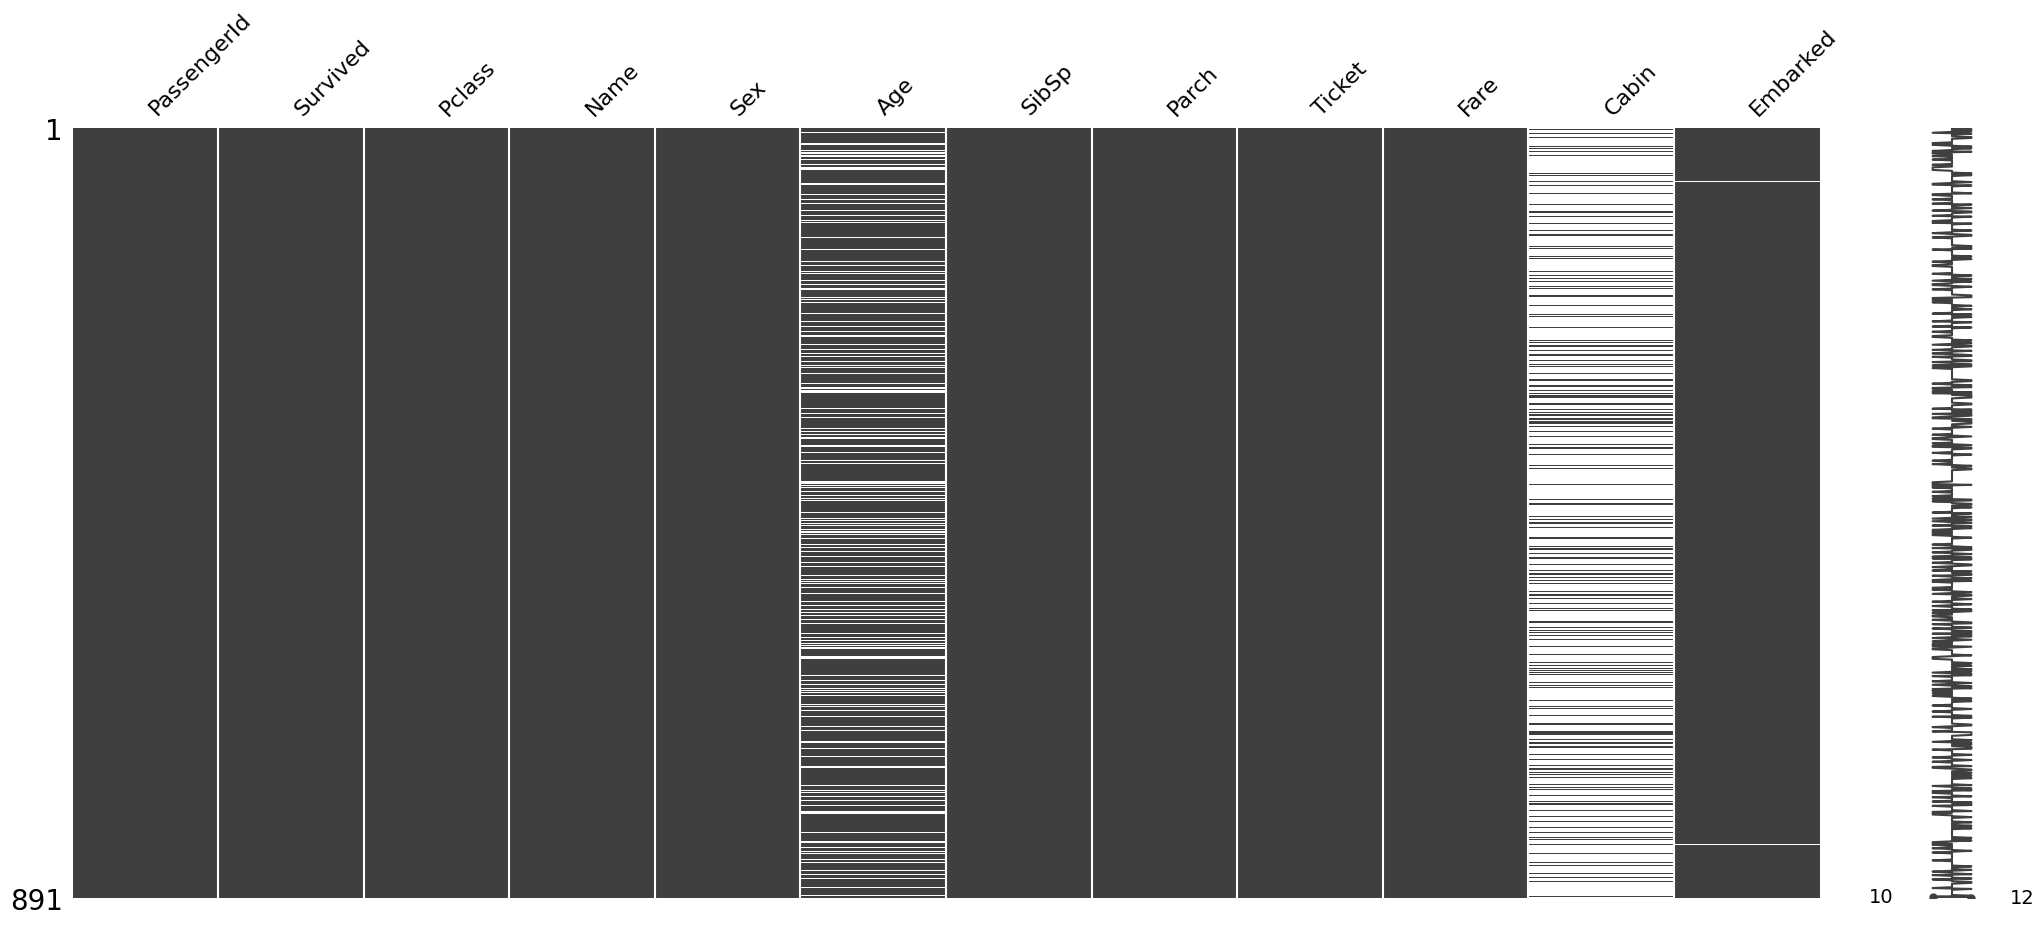

In [ ]:
missingno.matrix(train)

<Axes: >

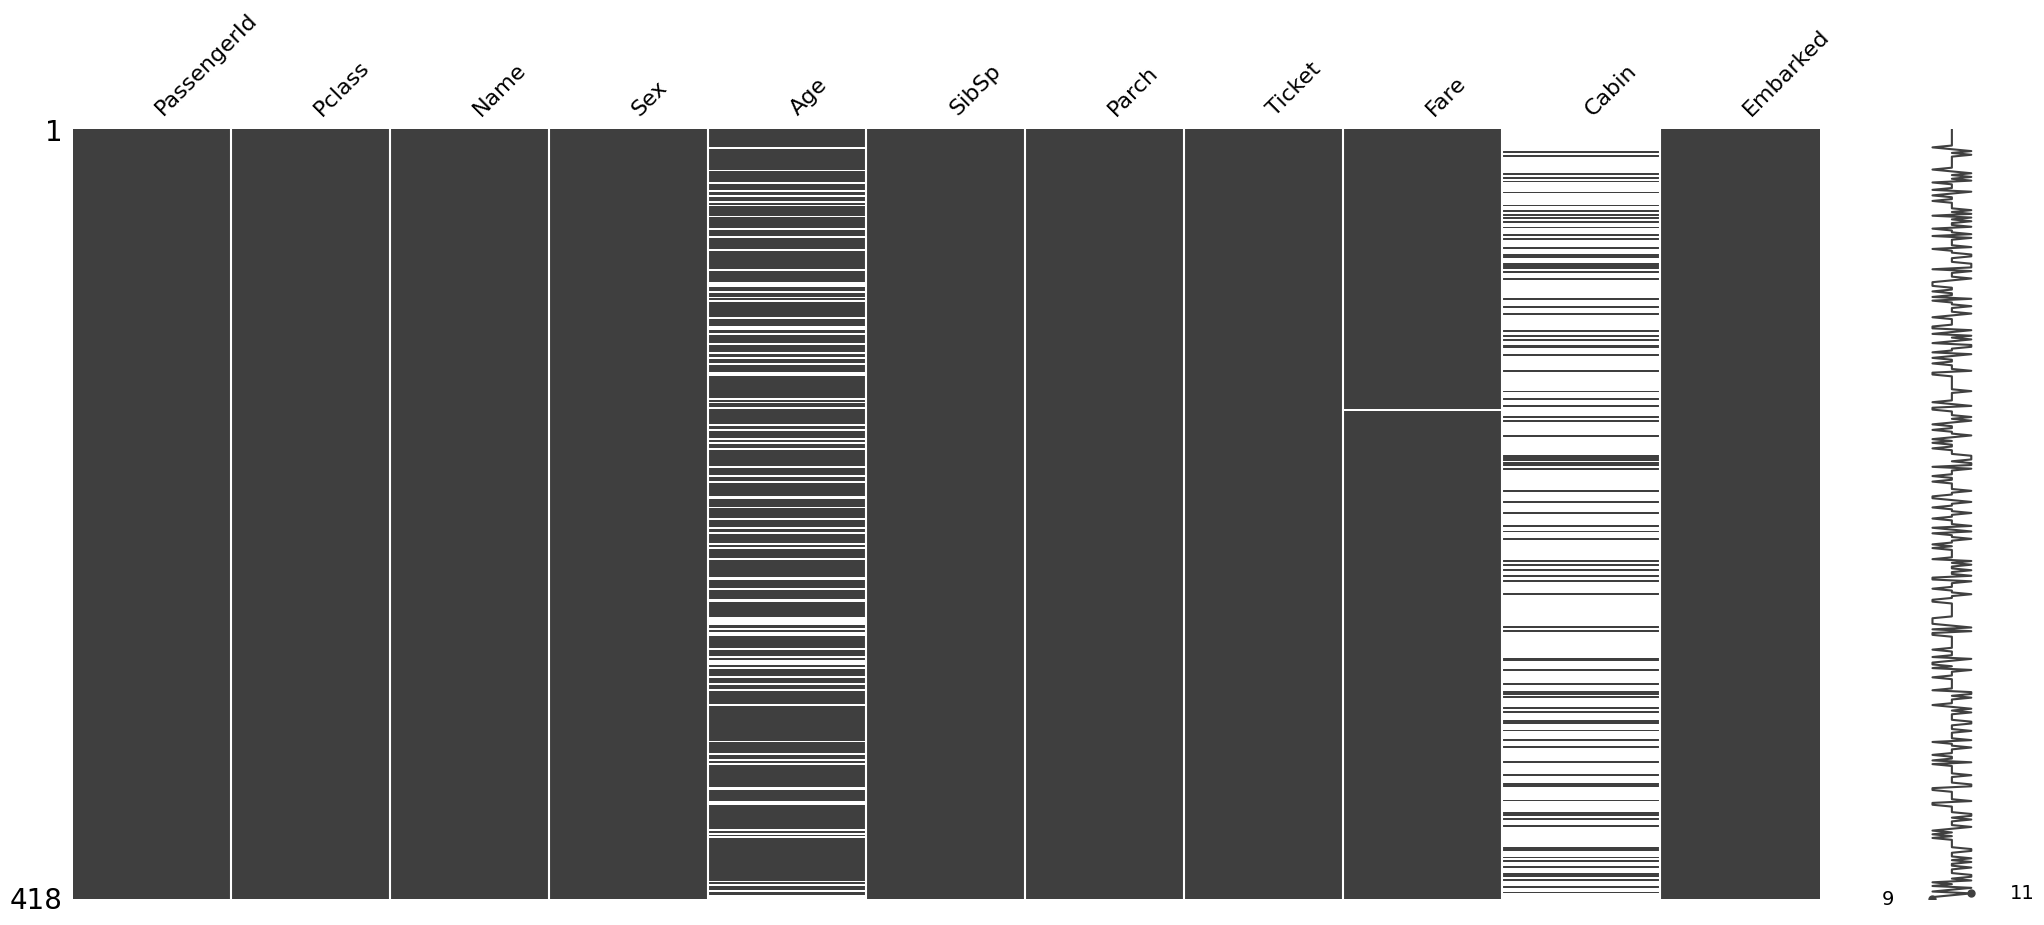

In [ ]:
missingno.matrix(test)

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Categorical Variables

In [ ]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
train[['Sex','Survived']].groupby('Sex',as_index = False).mean().sort_values(by='Survived',ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 0, 'Sex')

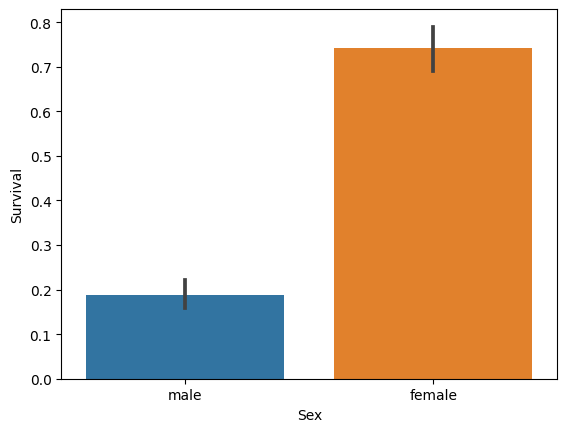

In [ ]:
sns.barplot(x='Sex',y='Survived', data =train)
plt.ylabel('Survival')
plt.xlabel('Sex')

In [ ]:
pclass = train['Pclass']
pclass.unique()

array([3, 1, 2])

In [ ]:
pclass.value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
train[['Pclass','Survived']].groupby('Pclass',as_index = False).mean().sort_values(by='Survived',ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 0, 'Pclass')

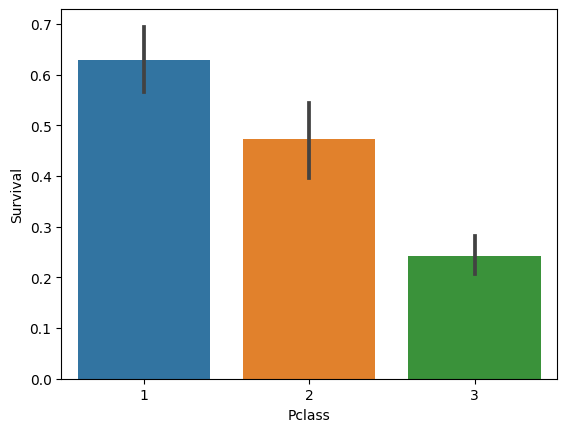

In [ ]:
sns.barplot(x='Pclass',y='Survived', data =train)
plt.ylabel('Survival')
plt.xlabel('Pclass')

In [ ]:
train['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [ ]:
train[['Embarked','Survived']].groupby('Embarked',as_index = False).mean().sort_values(by='Survived',ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 0, 'Embarked')

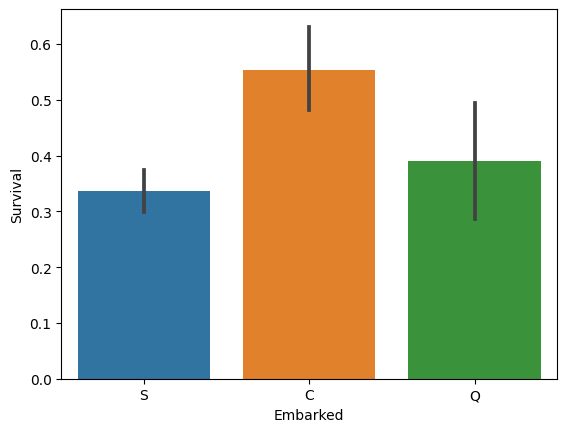

In [ ]:
sns.barplot(x='Embarked',y='Survived', data =train)
plt.ylabel('Survival')
plt.xlabel('Embarked')

Numerical Variable

<Axes: >

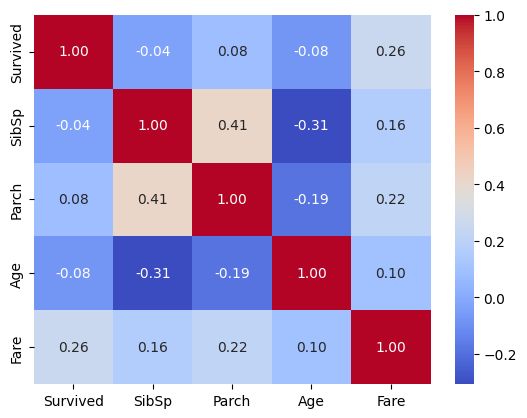

In [ ]:
#correlation
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

In [ ]:
train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0.5, 1.0, 'SibSp')

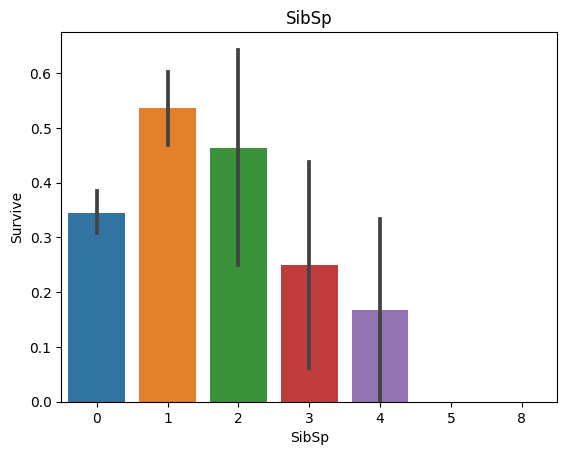

In [ ]:
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Survive')
plt.title('SibSp')

In [ ]:
train['Parch'].value_counts(dropna = False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Parch')

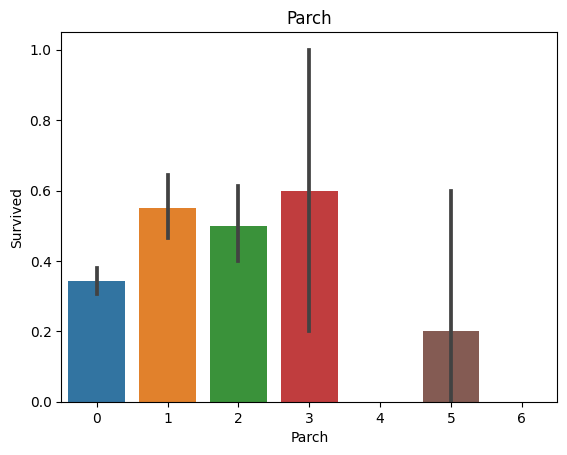

In [ ]:
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Survived')
plt.title('Parch')

In [ ]:
train['Age'].isnull().sum()

177

Text(0.5, 1.0, 'Passenger Age Distribution')

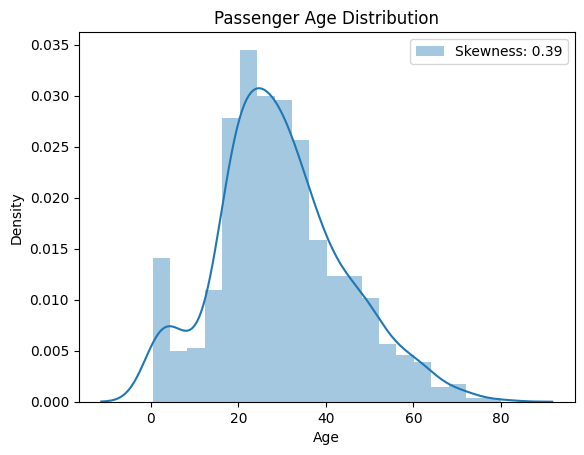

In [ ]:
sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

In [ ]:
g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')

In [ ]:
train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

In [ ]:
train.isnull().sum().sort_values(ascending = False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [ ]:
mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [ ]:
train['Embarked'].fillna(mode, inplace = True)

In [ ]:
test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [ ]:
median = test['Fare'].dropna().median()
median

14.4542

In [ ]:
test['Fare'].fillna(median, inplace = True)

In [ ]:
titanic = pd.concat([train, test], axis = 0).reset_index(drop = True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
titanic.isnull().sum().sort_values(ascending = False)

Survived       418
Age            263
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [ ]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

<Axes: >

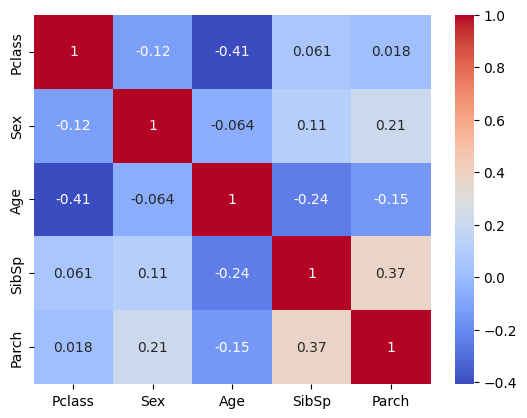

In [ ]:
sns.heatmap(titanic.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis = 1).corr(), annot = True, cmap = 'coolwarm')

In [ ]:
age_nan_indices = list(titanic[titanic['Age'].isnull()].index)
len(age_nan_indices)

263

In [ ]:
for index in age_nan_indices:
    median_age = titanic['Age'].median()
    predict_age = titanic['Age'][(titanic['SibSp'] == titanic.iloc[index]['SibSp'])
                                 & (titanic['Parch'] == titanic.iloc[index]['Parch'])
                                 & (titanic['Pclass'] == titanic.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        titanic['Age'].iloc[index] = median_age
    else:
        titanic['Age'].iloc[index] = predict_age

In [ ]:
titanic['Age'].isnull().sum()

0

Feature Encoding

In [ ]:
titanic = pd.get_dummies(titanic, columns = ['Embarked'], prefix = 'Em')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Em_C,Em_Q,Em_S
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,0,1


In [ ]:
titanic['FareBand'] = pd.cut(titanic['Fare'], 4)
titanic[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.512, 128.0]",0.368113
1,"(128.0, 256.0]",0.724138
2,"(256.0, 384.0]",0.666667
3,"(384.0, 512.0]",1.000000


In [ ]:
titanic.loc[titanic['Fare'] <= 1.56, 'Fare'] = 0
titanic.loc[(titanic['Fare'] > 1.56) & (titanic['Fare'] <= 3.119), 'Fare'] = 1
titanic.loc[(titanic['Fare'] > 3.119) & (titanic['Fare'] <= 4.679), 'Fare'] = 2
titanic.loc[titanic['Fare'] > 4.679, 'Fare'] = 3

In [ ]:
titanic['Fare'] = titanic['Fare'].astype('int')

In [ ]:
titanic = titanic.drop('FareBand', axis = 1)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Em_C,Em_Q,Em_S
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,1,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,1,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,1,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,1,0,0,1


In [ ]:
train = titanic[:len(train)]
test = titanic[len(train):]

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Em_C,Em_Q,Em_S
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,1,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,1,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,1,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,1,0,0,1


In [ ]:
train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Em_C,Em_Q,Em_S
0,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1,0,0,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,1,1,0,0
2,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,1,0,0,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,1,0,0,1
4,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,1,0,0,1


In [ ]:
train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Em_C,Em_Q,Em_S
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,1,1,0,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,1,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,1,0,0,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,1,0,0,1


In [ ]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Em_C,Em_Q,Em_S
891,892,NaN,3,"Kelly, Mr. James",0,34.5,0,0,1,0,1,0
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,1,0,0,1
893,894,NaN,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,1,0,1,0
894,895,NaN,3,"Wirz, Mr. Albert",0,27.0,0,0,1,0,0,1
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,1,0,0,1


In [ ]:
test = test.drop('Survived', axis = 1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Em_C,Em_Q,Em_S
891,892,3,"Kelly, Mr. James",0,34.5,0,0,1,0,1,0
892,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,1,0,0,1
893,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,1,0,1,0
894,895,3,"Wirz, Mr. Albert",0,27.0,0,0,1,0,0,1
895,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,1,0,0,1


Modelling

In [ ]:
X_train = train.drop(['Survived','Name'], axis = 1)
Y_train = train['Survived']
X_test = test.drop(['PassengerId','Name'], axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (891, 9)
Y_train shape:  (891,)
X_test shape:  (418, 9)


In [ ]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print("Accuracy: ",acc_log)

Accuracy:  80.47


In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print("Accuracy: ", acc_knn)

Accuracy:  84.74


In [ ]:
#Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

acc_rf = round(model.score(X_train,Y_train)*100,2)
print("Accuracy : ", acc_rf)

Accuracy :  84.62


In [ ]:
#DECISION TREE
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print("Accuracy : ",acc_decision_tree )

Accuracy :  93.71


In [ ]:
print("Accuracy(LOGISTIC REGRESSION): ",acc_log)
print("Accuracy(KNN): ", acc_knn)
print("Accuracy(RANDOM FOREST) : ", acc_rf)
print("Accuracy(DECISION TREE) : ",acc_decision_tree )

Accuracy(LOGISTIC REGRESSION):  80.47
Accuracy(KNN):  84.74
Accuracy(RANDOM FOREST) :  84.62
Accuracy(DECISION TREE) :  93.71
